# Groww With Code Internship Program

## Beginner Level Task 

### Stock Market Prediction and Forcasting using stacked LSTM

##### Import Librarys

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
%matplotlib inline

### Load Dataset

In [46]:
data = pd.read_csv("ADANIPORTS.csv")
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [47]:
data.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03,3.322000e+03,2.456000e+03,3.322000e+03,3322.000000
mean,344.114314,344.763019,351.608007,337.531969,344.239539,344.201626,344.853182,2.954564e+06,1.070144e+14,4.492259e+04,1.207441e+06,0.445899
std,192.936882,193.619992,198.617808,188.676614,193.187813,193.045886,193.841305,4.104227e+06,2.625564e+14,5.023124e+04,1.398640e+06,0.160496
min,108.000000,108.000000,110.450000,105.650000,108.000000,108.000000,108.340000,1.236600e+04,2.415857e+11,3.660000e+02,5.383000e+03,0.067000
25%,164.312500,164.850000,168.000000,161.600000,164.075000,164.312500,164.855000,7.493682e+05,1.817650e+13,2.083200e+04,3.212005e+05,0.332900
50%,324.700000,325.750000,331.275000,319.850000,325.000000,324.700000,325.765000,2.007292e+06,5.836041e+13,3.588150e+04,8.132775e+05,0.445650
75%,400.912500,401.000000,407.187500,395.000000,400.912500,400.912500,400.607500,3.636883e+06,1.158526e+14,5.336875e+04,1.605528e+06,0.555850
max,1307.450000,1310.250000,1324.000000,1270.000000,1308.000000,1307.450000,1302.150000,9.771788e+07,8.160988e+15,1.205984e+06,2.241652e+07,0.979800


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 389.4

In [49]:
data.isna().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [55]:
df_close = data['Close']

In [56]:
df_close.shape

(3322,)

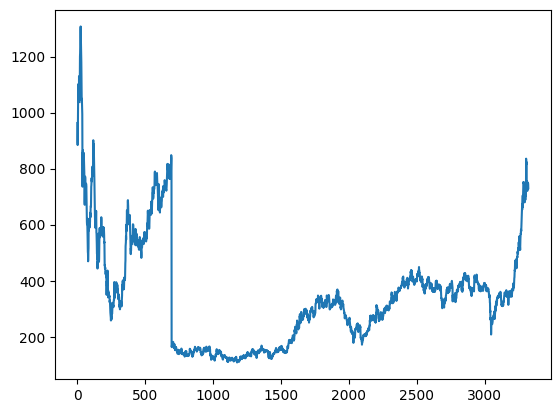

In [57]:
plt.plot(df_close)

### Drop unnecessary Columns 

In [58]:
data = data[['Date','Close','Open','High','Low']]
data = data.set_index('Date')

### Data Preprocessing

In [59]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

### Create Sequences for training

In [52]:

def Create_Sequences(data, seq_length):
    sequences = []
    target = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        target.append(data[i+seq_length])
    return np.array(sequences), np.array(target)

sequences_length = 10
X,y = Create_Sequences(data, sequences_length)

### Split the data into training and testing sets

In [53]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

### Create and train the LSTM model

In [60]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape =(sequences_length, data.shape[1])))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(data.shape[1]))

In [61]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
83/83 [==============================] - 5s 17ms/step - loss: 0.0113
Epoch 2/100
83/83 [==============================] - 1s 17ms/step - loss: 0.0011
Epoch 3/100
83/83 [==============================] - 1s 15ms/step - loss: 8.2253e-04
Epoch 4/100
83/83 [==============================] - 1s 17ms/step - loss: 6.8828e-04
Epoch 5/100
83/83 [==============================] - 1s 16ms/step - loss: 6.3839e-04
Epoch 6/100
83/83 [==============================] - 1s 15ms/step - loss: 5.5337e-04
Epoch 7/100
83/83 [==============================] - 1s 16ms/step - loss: 5.1974e-04
Epoch 8/100
83/83 [==============================] - 1s 16ms/step - loss: 5.5716e-04
Epoch 9/100
83/83 [==============================] - 1s 16ms/step - loss: 5.3414e-04
Epoch 10/100
83/83 [==============================] - 1s 16ms/step - loss: 6.0354e-04
Epoch 11/100
83/83 [==============================] - 1s 17ms/step - loss: 4.5569e-04
Epoch 12/100
83/83 [==============================] - 1s 17ms/step - lo

### Make predictions

In [62]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

21/21 [==============================] - 0s 9ms/step


### Inverse transform scaling

In [63]:
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)

### Calculate and print RMSE (Root Mean Squared Error) for the test set

In [64]:
rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print(f"Root Mean Squared Error (RMSE) on Test Data: {rmse}")

Root Mean Squared Error (RMSE) on Test Data: 11.351635975666353


### Plot the results

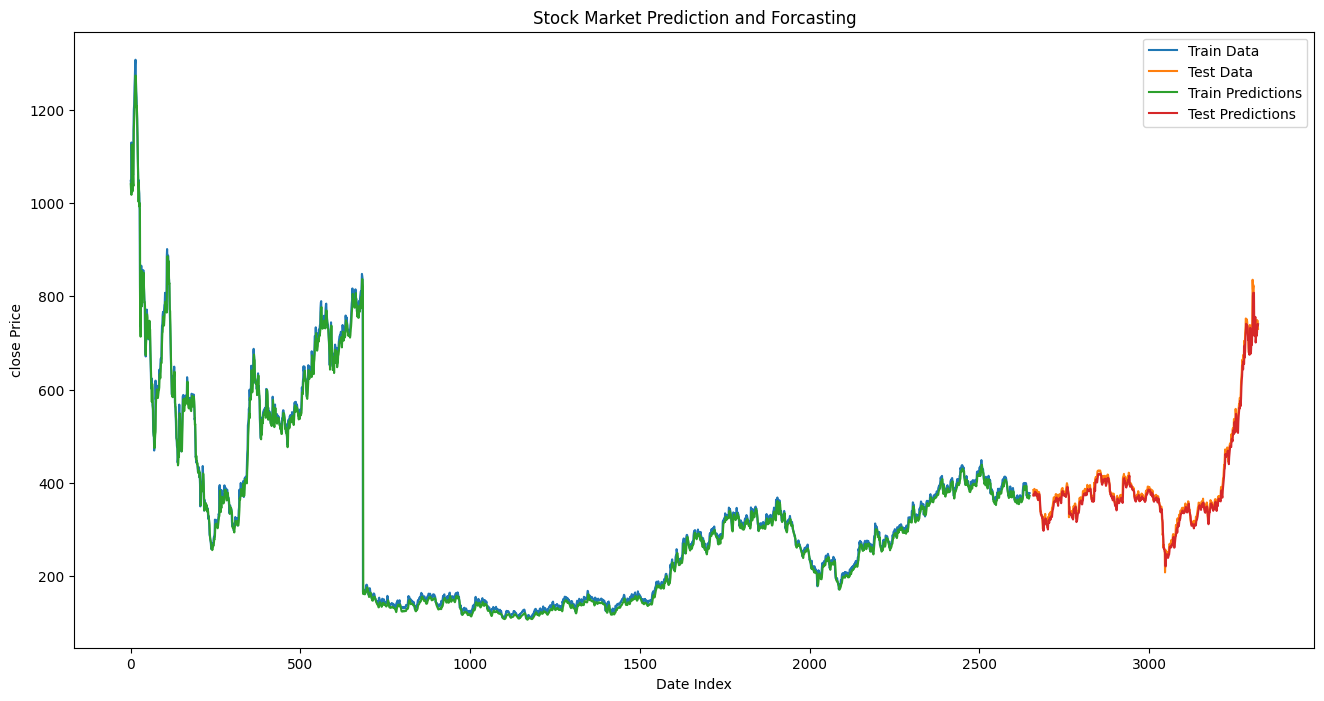

In [67]:
plt.figure(figsize=(16,8))
plt.title('Stock Market Prediction and Forcasting')
plt.xlabel('Date Index')
plt.ylabel('close Price')
plt.plot(np.arange(len(train_predictions)), y_train[:, 0], label='Train Data')
plt.plot(np.arange(len(train_predictions) + sequences_length,len(data)), y_test[:, 0], label='Test Data')
plt.plot(np.arange(len(train_predictions)), train_predictions[:, 0], label='Train Predictions')
plt.plot(np.arange(len(train_predictions) + sequences_length,len (data)), test_predictions[:,0], label='Test Predictions')
plt.legend()
plt.show()